# Editing the data folder

In [ ]:
import os
import glob
import shutil
import PIL
from PIL import Image
import matplotlib
import cv2
import numpy as np
import random

Renaming the Cat and Dog folders in PetImages.
Cat/0.jpg --------> Cat/cat.0.jpg

In [ ]:
def main():
    folder = r"/content/drive/MyDrive/ColabNotebooks/PetImages/Cat"    #/content/drive/MyDrive/ColabNotebooks/PetImages/Dog
    for count, filename in enumerate(os.listdir(folder)):
        dst = f"cat.{str(count)}.jpg"               #dst = f"dog.{str(count)}.jpg"
        src =f"{folder}/{filename}"  # foldername/filename, if .py file is outside folder
        dst =f"{folder}/{dst}"
        os.rename(src, dst)
        
if __name__ == "__main__":
    main()

In [ ]:
directory = "cat_dog"
parent_dir = "/content/drive/MyDrive/ColabNotebooks/PetImages/"
path = os.path.join(parent_dir, directory)
os.mkdir(path)

In [ ]:
directory = "cat_dog"
parent_dir = "/content/drive/MyDrive/ColabNotebooks/PetImages/"
path = os.path.join(parent_dir, directory)
os.mkdir(path)

In [ ]:
dog = "/content/drive/MyDrive/ColabNotebooks/PetImages/Dog"
cat = "/content/drive/MyDrive/ColabNotebooks/PetImages/Cat"
cat_dog = r"/content/drive/MyDrive/ColabNotebooks/PetImages/cat_dog/"

Moving the renamed images to a new folder named cat_dog with shutil copy to collect images in one folder.

In [ ]:
for i in cat:
    shutil.copy(i,cat_dog)
    print("copied:",i)

In [ ]:
for i in dog:
    shutil.copy(i,cat_dog)
    print("copied:",i )

# Importing libraries, modules and data

In [ ]:
import pandas as pd
import os
import tensorflow as tf
import pathlib
import glob
import shutil
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import random 
import pathlib
import cv2
import numpy as np

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pathlib
data_dir = '/content/drive/MyDrive/ColabNotebooks/cat_dog/'
data_dir = pathlib.Path(data_dir)

# Analyzing the images

In [ ]:
image_count = len(list(data_dir.glob('*.jpg')))
print(f"There is {image_count} photos in total.")

There is 25015 photos in total.


/content/drive/MyDrive/ColabNotebooks/cat_dog/cat.2847.jpg
<class 'pathlib.PosixPath'>


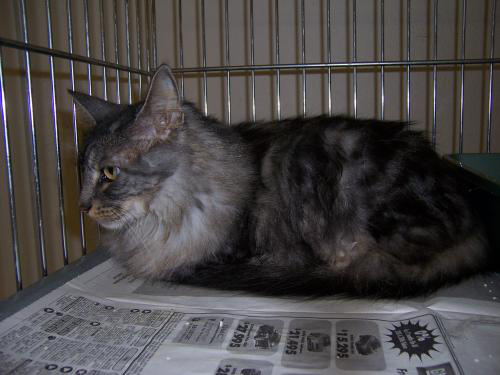

In [ ]:
cats = list(data_dir.glob('cat.*.jpg'))
print(cats[0])
print(type(cats[0]))
PIL.Image.open(cats[0])

/content/drive/MyDrive/ColabNotebooks/cat_dog/dog.5500.jpg
<class 'pathlib.PosixPath'>


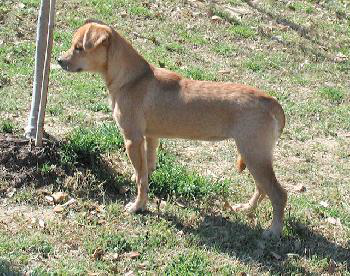

In [ ]:
dogs = list(data_dir.glob('dog*.*.jpg'))
print(dogs[0])
print(type(dogs[0]))
PIL.Image.open(dogs[0])

In [ ]:
len(dogs)

12509

In [ ]:
len(cats)

12506

# Resizing the data

We couldn't process all 25000 images due to lack of necessary processor units such as GPU. 

So, we select 1000 images randomly by shuffling them with random.sample() function.

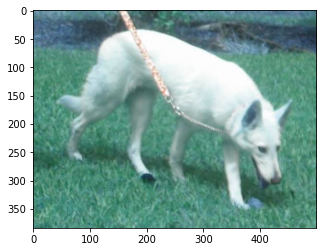

In [ ]:
cat_dog_img = random.sample(list(data_dir.glob("*jpg")), k=1000)
photo = cv2.imread(str(cat_dog_img[10]))
plt.imshow(photo)

In [ ]:
print(len(cat_dog_img))
cat_dog_img[:5]

1000


[PosixPath('/content/drive/MyDrive/ColabNotebooks/cat_dog/cat.8672.jpg'),
 PosixPath('/content/drive/MyDrive/ColabNotebooks/cat_dog/dog.11014.jpg'),
 PosixPath('/content/drive/MyDrive/ColabNotebooks/cat_dog/cat.6880.jpg'),
 PosixPath('/content/drive/MyDrive/ColabNotebooks/cat_dog/cat.9486.jpg'),
 PosixPath('/content/drive/MyDrive/ColabNotebooks/cat_dog/dog.7033.jpg')]

# Preprocessing

Creating x and y lists for images and labels.

In [ ]:
x, y = [], []

Inside the for loop, images have been normalized by resizing and scaling. 
Then images and labels have appended to x and y lists.  

In [ ]:
for i in range(len(cat_dog_img)):
    img_path = str(cat_dog_img[i])
    img = Image.open(img_path)
    img = img.convert('RGB')
    resized_img = img.resize((224, 224))
    arr_img = np.asarray(resized_img) / 255
    label = img_path.split("/")[-1][0:3]
    if label == 'dog':
        label_bin = 1
    else:
        label_bin = 0
    x.append(arr_img)
    y.append(label_bin)

Checking the x and y lists and items:

In [ ]:
len(x)

1000

In [ ]:
len(y)

1000

In [ ]:
type(x[0])

numpy.ndarray

In [ ]:
type(y[0])

int

In [ ]:
y[0]

0

Converting lists to numpy arrays for our model to fit.

In [ ]:
x = np.array(x)
y = np.array(y)

In [ ]:
type(x)

numpy.ndarray

In [ ]:
type(y)

numpy.ndarray

# Preparing train, validation and test sets

Splitting the dataset to train, validation and test sets. 

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size= 0.2)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, random_state=42, test_size = 0.25)

In [ ]:
y_train[:3]

array([1, 0, 1])

# Saving datasets.

Saving numpy arrays to use them for the second part. 

In [ ]:
from google.colab import files

np.save("x_train.npy", x_train)
files.download("x_train.npy")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
np.save("y_train.npy", y_train)
files.download("y_train.npy")

np.save("x_val.npy", x_val)
files.download("x_val.npy")

np.save("y_val.npy", y_val)
files.download("y_val.npy")

np.save("x_test.npy", x_test)
files.download("x_test.npy")

np.save("y_test.npy", y_test)
files.download("y_test.npy")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>